# New York Airbnb Data Analysis with pyhive

## Loading and cleaning Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from pyhive import hive

In [3]:
df=pd.read_csv('AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Check the null value

In [5]:
df.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10052
last_review                       10052
host_name                            21
name                                 16
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

### drop the unnecessary colomn

In [6]:
df.drop(['id','name','host_name','last_review'], axis=1, inplace=True)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Please note that we are dropping'host_name' not only because it is insignificant but also for ethical reasons. There should be no reasoning to continue data exploration and model training (which we will be doing later) towards specific individuals based on their names. Those names are assigned to actual humans, also they present no security threat or military/governmental interest based on the nature of the dataset, therefore names are unimportant to us.

### replacing all NaN values in 'reviews_per_month' with 0

In [7]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()#examing changes

0

### check duplicates

In [8]:
df.duplicated(keep='first')
df.drop_duplicates()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [9]:
df.dropna(axis=0, how='any', inplace=True)
df['neighbourhood'].replace(',', '', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 4.8+ MB


In [11]:
#df.to_csv('ny.csv',index=None)

In [12]:
conn = hive.connect("quickstart.cloudera", username="cloudera")
cursor = conn.cursor()

In [13]:
cursor.execute('DROP DATABASE IF EXISTS NYC CASCADE') # if one was created before
cursor.execute('CREATE DATABASE NYC')

#id INT,\
#name STRING,\
#host_name STRING,\
#last_review DATE,\

cursor.execute("CREATE TABLE IF NOT EXISTS NY3 (\
host_id BIGINT,\
neighbourhood_group STRING,\
neighbourhood STRING,\
latitude DOUBLE,\
longitude DOUBLE,\
room_type STRING,\
price BIGINT,\
minimum_nights BIGINT,\
number_of_reviews BIGINT,\
reviews_per_month DOUBLE,\
calculated_host_listings_count BIGINT,\
availability_365 BIGINT)\
ROW FORMAT DELIMITED \
FIELDS TERMINATED BY ','")



cursor.execute("LOAD DATA LOCAL INPATH '/home/cloudera/Downloads/ny.csv' OVERWRITE INTO TABLE NY3")

cursor.execute('SET hive.cli.print.header=true')

## Data Quality

In [14]:
cursor.execute('SELECT * FROM NY3')
query = cursor.fetchall()
rows = pd.DataFrame(query, columns=(['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']))
print(rows.count())
print('Data Quality')

host_id                           48893
neighbourhood_group               48894
neighbourhood                     48894
latitude                          48893
longitude                         48893
room_type                         48894
price                             48893
minimum_nights                    48893
number_of_reviews                 48893
reviews_per_month                 48893
calculated_host_listings_count    48893
availability_365                  48893
dtype: int64
Data Quality


### the number of each neighbourhood group

Repartition by neighbourhood_group


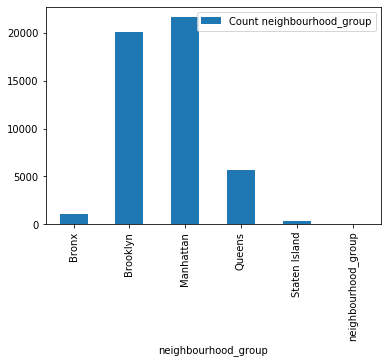

In [15]:
cursor.execute('SELECT neighbourhood_group ,COUNT(neighbourhood_group)  FROM NY3 GROUP BY neighbourhood_group')
query = cursor.fetchall()
rows = pd.DataFrame(query, columns=(['neighbourhood_group', 'Count neighbourhood_group']))
rows.plot(x='neighbourhood_group',y='quantity', kind='bar')
print('Repartition by neighbourhood_group')

### the number of each neighbourhood

Repartition by neighbourhood


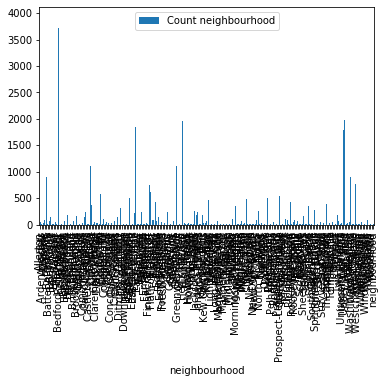

In [28]:
cursor.execute('SELECT neighbourhood ,COUNT(neighbourhood)  FROM NY3 GROUP BY neighbourhood')
query = cursor.fetchall()
rows = pd.DataFrame(query, columns=(['neighbourhood', 'Count neighbourhood']))
rows.plot(x='neighbourhood', kind='bar')
print('Repartition by neighbourhood')

### neighbourhood with most airbnb

In [45]:
cursor.execute('SELECT neighbourhood ,MAX(mycount)  FROM ( \
SELECT neighbourhood, COUNT(neighbourhood) AS mycount \
FROM NY3 GROUP BY neighbourhood) \
GROUP BY neighbourhood')
queryNei = cursor.fetchall()
print("neighbourhood with most airbnb:")
queryNei

OperationalError: TExecuteStatementResp(status=TStatus(statusCode=3, infoMessages=["*org.apache.hive.service.cli.HiveSQLException:Error while compiling statement: FAILED: ParseException line 1:136 missing EOF at 'BY' near 'GROUP':28:27", 'org.apache.hive.service.cli.operation.Operation:toSQLException:Operation.java:400', 'org.apache.hive.service.cli.operation.SQLOperation:prepare:SQLOperation.java:187', 'org.apache.hive.service.cli.operation.SQLOperation:runInternal:SQLOperation.java:271', 'org.apache.hive.service.cli.operation.Operation:run:Operation.java:337', 'org.apache.hive.service.cli.session.HiveSessionImpl:executeStatementInternal:HiveSessionImpl.java:439', 'org.apache.hive.service.cli.session.HiveSessionImpl:executeStatement:HiveSessionImpl.java:405', 'sun.reflect.GeneratedMethodAccessor29:invoke::-1', 'sun.reflect.DelegatingMethodAccessorImpl:invoke:DelegatingMethodAccessorImpl.java:43', 'java.lang.reflect.Method:invoke:Method.java:606', 'org.apache.hive.service.cli.session.HiveSessionProxy:invoke:HiveSessionProxy.java:78', 'org.apache.hive.service.cli.session.HiveSessionProxy:access$000:HiveSessionProxy.java:36', 'org.apache.hive.service.cli.session.HiveSessionProxy$1:run:HiveSessionProxy.java:63', 'java.security.AccessController:doPrivileged:AccessController.java:-2', 'javax.security.auth.Subject:doAs:Subject.java:415', 'org.apache.hadoop.security.UserGroupInformation:doAs:UserGroupInformation.java:1917', 'org.apache.hive.service.cli.session.HiveSessionProxy:invoke:HiveSessionProxy.java:59', 'com.sun.proxy.$Proxy26:executeStatement::-1', 'org.apache.hive.service.cli.CLIService:executeStatement:CLIService.java:257', 'org.apache.hive.service.cli.thrift.ThriftCLIService:ExecuteStatement:ThriftCLIService.java:501', 'org.apache.hive.service.cli.thrift.TCLIService$Processor$ExecuteStatement:getResult:TCLIService.java:1313', 'org.apache.hive.service.cli.thrift.TCLIService$Processor$ExecuteStatement:getResult:TCLIService.java:1298', 'org.apache.thrift.ProcessFunction:process:ProcessFunction.java:39', 'org.apache.thrift.TBaseProcessor:process:TBaseProcessor.java:39', 'org.apache.hive.service.auth.TSetIpAddressProcessor:process:TSetIpAddressProcessor.java:56', 'org.apache.thrift.server.TThreadPoolServer$WorkerProcess:run:TThreadPoolServer.java:286', 'java.util.concurrent.ThreadPoolExecutor:runWorker:ThreadPoolExecutor.java:1145', 'java.util.concurrent.ThreadPoolExecutor$Worker:run:ThreadPoolExecutor.java:615', 'java.lang.Thread:run:Thread.java:745', "*org.apache.hadoop.hive.ql.parse.ParseException:line 1:136 missing EOF at 'BY' near 'GROUP':32:5", 'org.apache.hadoop.hive.ql.parse.ParseDriver:parse:ParseDriver.java:212', 'org.apache.hadoop.hive.ql.parse.ParseDriver:parse:ParseDriver.java:166', 'org.apache.hadoop.hive.ql.Driver:compile:Driver.java:522', 'org.apache.hadoop.hive.ql.Driver:compileInternal:Driver.java:1356', 'org.apache.hadoop.hive.ql.Driver:compileAndRespond:Driver.java:1343', 'org.apache.hive.service.cli.operation.SQLOperation:prepare:SQLOperation.java:185'], sqlState='42000', errorCode=40000, errorMessage="Error while compiling statement: FAILED: ParseException line 1:136 missing EOF at 'BY' near 'GROUP'"), operationHandle=None)

### the number of each room type

Repartition by room_type


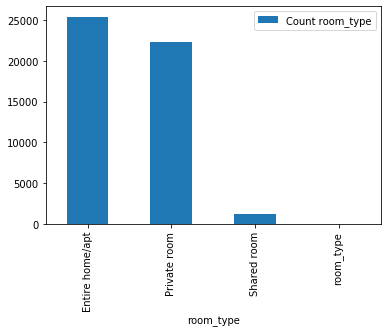

In [17]:
cursor.execute('SELECT room_type ,COUNT(room_type)  FROM NY3 GROUP BY room_type')
query = cursor.fetchall()
rows = pd.DataFrame(query, columns=(['room_type', 'Count room_type']))
rows.plot(x='room_type', kind='bar')
print('Repartition by room_type')

In [51]:
cursor.execute('SELECT AVG(price) FROM NY3')
queryAP = cursor.fetchall()
print("average price:")
queryAP

average price:


[(152.72274149673777,)]

### Average price by room_type

average price by room_type


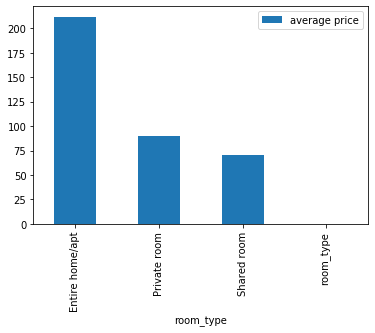

In [60]:
cursor.execute('SELECT room_type ,AVG(price) AS AP FROM NY3 GROUP BY room_type')
query = cursor.fetchall()
rows = pd.DataFrame(query, columns=(['room_type', 'average price']))
rows.plot(x='room_type', kind='bar')
print('average price by room_type')

### Average price by neighbourhood_group

average price by neighbourhood_group


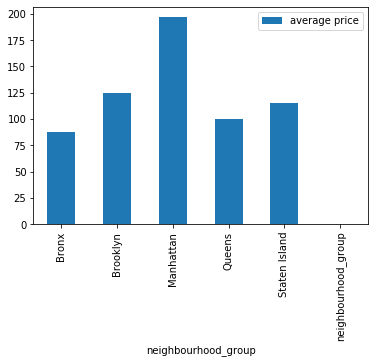

In [61]:
cursor.execute('SELECT neighbourhood_group ,AVG(price) AS AP FROM NY3 GROUP BY neighbourhood_group')
query = cursor.fetchall()
rows = pd.DataFrame(query, columns=(['neighbourhood_group', 'average price']))
rows.plot(x='neighbourhood_group', kind='bar')
print('average price by neighbourhood_group')

In [73]:
cursor.execute('SELECT neighbourhood ,AVG(price) AS AP FROM NY3 GROUP BY neighbourhood \
WHERE number_of_reviews = "Brooklyn" ')
query = cursor.fetchall()
rows = pd.DataFrame(query, columns=(['neighbourhood', 'average price']))
rows.plot(x='neighbourhood', kind='bar')
print('average price by neighbourhood')

OperationalError: TExecuteStatementResp(status=TStatus(statusCode=3, infoMessages=["*org.apache.hive.service.cli.HiveSQLException:Error while compiling statement: FAILED: ParseException line 1:71 missing EOF at 'WHERE' near 'neighbourhood':28:27", 'org.apache.hive.service.cli.operation.Operation:toSQLException:Operation.java:400', 'org.apache.hive.service.cli.operation.SQLOperation:prepare:SQLOperation.java:187', 'org.apache.hive.service.cli.operation.SQLOperation:runInternal:SQLOperation.java:271', 'org.apache.hive.service.cli.operation.Operation:run:Operation.java:337', 'org.apache.hive.service.cli.session.HiveSessionImpl:executeStatementInternal:HiveSessionImpl.java:439', 'org.apache.hive.service.cli.session.HiveSessionImpl:executeStatement:HiveSessionImpl.java:405', 'sun.reflect.GeneratedMethodAccessor29:invoke::-1', 'sun.reflect.DelegatingMethodAccessorImpl:invoke:DelegatingMethodAccessorImpl.java:43', 'java.lang.reflect.Method:invoke:Method.java:606', 'org.apache.hive.service.cli.session.HiveSessionProxy:invoke:HiveSessionProxy.java:78', 'org.apache.hive.service.cli.session.HiveSessionProxy:access$000:HiveSessionProxy.java:36', 'org.apache.hive.service.cli.session.HiveSessionProxy$1:run:HiveSessionProxy.java:63', 'java.security.AccessController:doPrivileged:AccessController.java:-2', 'javax.security.auth.Subject:doAs:Subject.java:415', 'org.apache.hadoop.security.UserGroupInformation:doAs:UserGroupInformation.java:1917', 'org.apache.hive.service.cli.session.HiveSessionProxy:invoke:HiveSessionProxy.java:59', 'com.sun.proxy.$Proxy26:executeStatement::-1', 'org.apache.hive.service.cli.CLIService:executeStatement:CLIService.java:257', 'org.apache.hive.service.cli.thrift.ThriftCLIService:ExecuteStatement:ThriftCLIService.java:501', 'org.apache.hive.service.cli.thrift.TCLIService$Processor$ExecuteStatement:getResult:TCLIService.java:1313', 'org.apache.hive.service.cli.thrift.TCLIService$Processor$ExecuteStatement:getResult:TCLIService.java:1298', 'org.apache.thrift.ProcessFunction:process:ProcessFunction.java:39', 'org.apache.thrift.TBaseProcessor:process:TBaseProcessor.java:39', 'org.apache.hive.service.auth.TSetIpAddressProcessor:process:TSetIpAddressProcessor.java:56', 'org.apache.thrift.server.TThreadPoolServer$WorkerProcess:run:TThreadPoolServer.java:286', 'java.util.concurrent.ThreadPoolExecutor:runWorker:ThreadPoolExecutor.java:1145', 'java.util.concurrent.ThreadPoolExecutor$Worker:run:ThreadPoolExecutor.java:615', 'java.lang.Thread:run:Thread.java:745', "*org.apache.hadoop.hive.ql.parse.ParseException:line 1:71 missing EOF at 'WHERE' near 'neighbourhood':32:5", 'org.apache.hadoop.hive.ql.parse.ParseDriver:parse:ParseDriver.java:212', 'org.apache.hadoop.hive.ql.parse.ParseDriver:parse:ParseDriver.java:166', 'org.apache.hadoop.hive.ql.Driver:compile:Driver.java:522', 'org.apache.hadoop.hive.ql.Driver:compileInternal:Driver.java:1356', 'org.apache.hadoop.hive.ql.Driver:compileAndRespond:Driver.java:1343', 'org.apache.hive.service.cli.operation.SQLOperation:prepare:SQLOperation.java:185'], sqlState='42000', errorCode=40000, errorMessage="Error while compiling statement: FAILED: ParseException line 1:71 missing EOF at 'WHERE' near 'neighbourhood'"), operationHandle=None)

### hosts (IDs) with the most listings on Airbnb

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

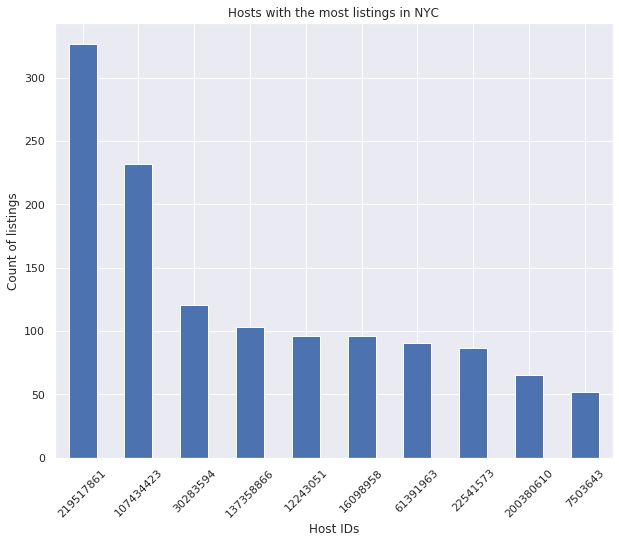

In [78]:
top_host=df.host_id.value_counts().head(10)
sns.set(rc={'figure.figsize':(10,8)})
viz_1=top_host.plot(kind='bar')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

### top reviewed listings

In [101]:
trl=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,650,7.75,3,293
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,650,14.58,2,333
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,600,7.57,3,339
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,600,7.72,3,342
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,600,13.40,2,173
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,550,6.95,1,179
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,550,11.59,5,163
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,550,16.22,5,341
113,42273,Brooklyn,South Slope,40.66853,-73.98912,Entire home/apt,120,30,500,4.22,2,192
225,277379,Manhattan,Harlem,40.82510,-73.94287,Private room,60,1,500,4.58,2,258


### Average price by number_of_reviews in 50 interval

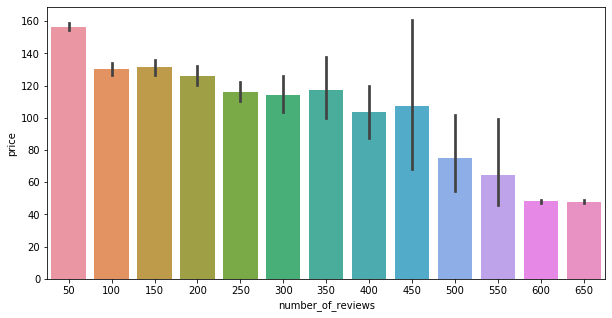

In [76]:
df3=df
df3.loc[df3['number_of_reviews']<50,'number_of_reviews']=50
df3.loc[(df3['number_of_reviews']>50)& (df3['number_of_reviews']<100),'number_of_reviews']=100
df3.loc[(df3['number_of_reviews']>100)& (df3['number_of_reviews']<150),'number_of_reviews']=150
df3.loc[(df3['number_of_reviews']>150)& (df3['number_of_reviews']<200),'number_of_reviews']=200
df3.loc[(df3['number_of_reviews']>200)& (df3['number_of_reviews']<250),'number_of_reviews']=250
df3.loc[(df3['number_of_reviews']>250)& (df3['number_of_reviews']<300),'number_of_reviews']=300
df3.loc[(df3['number_of_reviews']>300)& (df3['number_of_reviews']<350),'number_of_reviews']=350
df3.loc[(df3['number_of_reviews']>350)& (df3['number_of_reviews']<400),'number_of_reviews']=400
df3.loc[(df3['number_of_reviews']>400)& (df3['number_of_reviews']<450),'number_of_reviews']=450
df3.loc[(df3['number_of_reviews']>450)& (df3['number_of_reviews']<500),'number_of_reviews']=500
df3.loc[(df3['number_of_reviews']>500)& (df3['number_of_reviews']<550),'number_of_reviews']=550
df3.loc[(df3['number_of_reviews']>550)& (df3['number_of_reviews']<600),'number_of_reviews']=600
df3.loc[(df3['number_of_reviews']>600)& (df3['number_of_reviews']<650),'number_of_reviews']=650
plt.figure(figsize=(10,5))
sns.barplot(x = "number_of_reviews", y = "price", data = df3)
plt.xticks(rotation=0)
plt.show()

In [99]:
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,650,7.75,3,293
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,650,14.58,2,333
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,600,7.57,3,339
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,600,7.72,3,342
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,600,13.40,2,173
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,550,6.95,1,179
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,550,11.59,5,163
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,550,16.22,5,341
113,42273,Brooklyn,South Slope,40.66853,-73.98912,Entire home/apt,120,30,500,4.22,2,192
225,277379,Manhattan,Harlem,40.82510,-73.94287,Private room,60,1,500,4.58,2,258


In [83]:
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

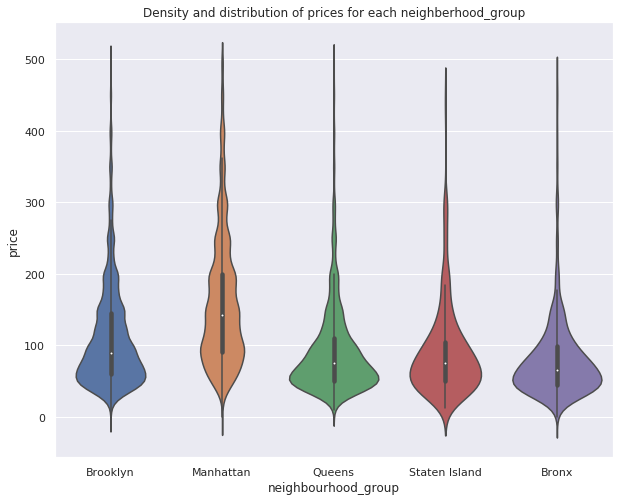

In [87]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

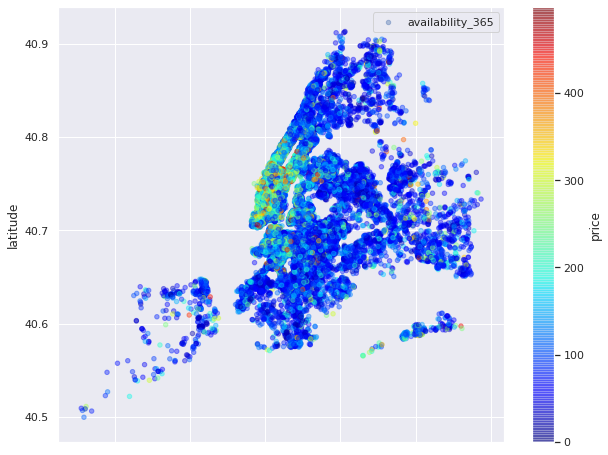

In [88]:
#let's see how scatterplot will come out 
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

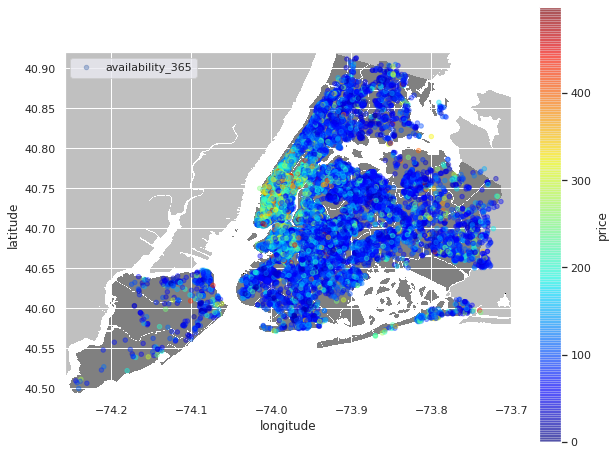

In [96]:
import urllib
plt.figure(figsize=(10,8))
#loading the png NYC image
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
#nyc_img=plt.imread('New_York_City_.png')
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,650,7.75,3,293
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,650,14.58,2,333
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,600,7.57,3,339
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,600,7.72,3,342
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,600,13.40,2,173
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,550,6.95,1,179
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,550,11.59,5,163
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,550,16.22,5,341
113,42273,Brooklyn,South Slope,40.66853,-73.98912,Entire home/apt,120,30,500,4.22,2,192
225,277379,Manhattan,Harlem,40.82510,-73.94287,Private room,60,1,500,4.58,2,258
